# Laboratorium 5 - kod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Pomiary dla zmiennego TR

In [2]:
# Odczytanie danych z pomiarów zależności sygnału od czasu TR
data_tr = pd.read_csv('tr.csv')
data_tr

,TR [ms],ROI0 mean,ROI0 sd,ROI1 mean,ROI1 sd,ROI2 mean,ROI2 sd,ROI3 mean,ROI3 sd,ROI4 mean,ROI4 sd,ROI5 mean,ROI5 sd
0,50,233.19,105.73,640.54,148.78,493.88,192.72,336.62,139.10,438.71,185.99,502.28,173.82
1,200,186.84,72.82,1478.13,119.78,1084.63,176.14,973.35,141.67,823.69,163.64,985.06,195.59
2,400,115.81,36.89,1510.75,74.85,1137.01,99.46,1068.85,95.25,851.12,99.44,1137.41,297.71
3,1000,64.89,99.17,1405.22,94.11,1157.36,100.46,1089.68,75.45,936.69,67.27,1187.24,331.28
4,2000,48.37,10.28,1324.98,42.81,1161.26,91.84,1085.89,65.45,1022.43,75.93,1266.10,356.72
5,3500,41.59,10.85,1282.30,38.81,1154.44,101.27,1082.05,66.09,1069.00,73.90,1267.29,396.23


In [3]:
# Zamiana danych na macierz
tr_matrix = data_tr.to_numpy()
# Normalizacja wartości średniej ROI0 (moc sygnału) - obszar poza obrazowanego obiektu
# Moc sygnału spada dla wyższych wartości czasu TR, obserwujemy to dla średniej wartości ROI0.
tr_matrix[:,1] = tr_matrix[:,1] / max(tr_matrix[:,1])
# Przeliczenie wartości średnich (mean) i odchyleń standardowy (sd) w zależności od mocy sygnału względem pomiaru dla TR=50 ms
for i in range(3,13):
    tr_matrix[:,i] = tr_matrix[:,i] / tr_matrix[:,1]

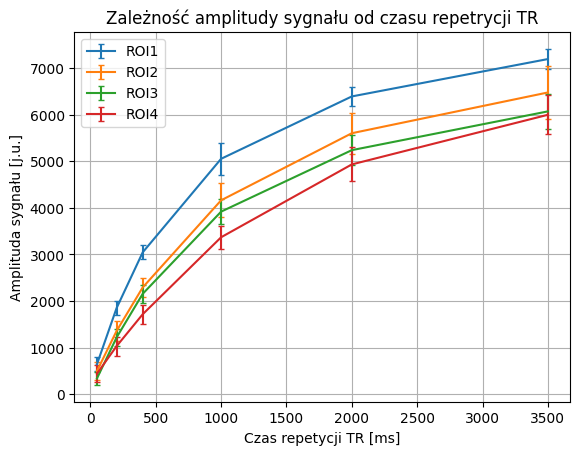

In [4]:
# Wykres zależności amplitudy sygnału od czasu
tr = tr_matrix[:,0]
for i in range(3,11,2):
    plt.errorbar(tr, tr_matrix[:,i], yerr=tr_matrix[:,i+1], label="ROI"+str(int((i-1)/2)),capsize=2.5)
plt.title('Zależność amplitudy sygnału od czasu repetrycji TR')
plt.xlabel('Czas repetycji TR [ms]')
plt.ylabel('Amplituda sygnału [j.u.]')
plt.legend()
plt.grid()
plt.savefig('tr_wykres.pdf')
plt.show()

# Pomiary dla zmiennego TE

In [5]:
# Odczytanie danych z pomiarów zależności sygnału od czasu TE
data_te = pd.read_csv('te.csv')
data_te

,TE,ROI0 mean,ROI0 sd,ROI1 mean,ROI1 sd,ROI2 mean,ROI2 sd,ROI3 mean,ROI3 sd,ROI4 mean,ROI4 sd,ROI5 mean,ROI5 sd
0,80,35.77,2.65,1332.71,44.32,1151.07,155.05,863.11,132.92,1147.68,115.59,1028.69,553.74
1,90,38.30,2.35,1321.25,57.48,1160.26,173.22,807.12,149.24,1186.34,143.39,1049.14,579.50
2,100,39.65,2.03,1350.63,65.00,1138.17,207.84,757.26,168.78,1206.95,166.46,1019.67,588.21
3,110,48.25,2.44,1363.84,90.01,1152.69,238.52,706.16,178.85,1269.37,187.05,1087.25,619.18
4,120,46.51,2.99,1349.59,96.28,1156.41,254.95,721.56,191.06,1282.71,184.61,1106.22,620.00


In [6]:
# Zamiana danych na macierz
te_matrix = data_te.to_numpy()
# Normalizacja wartości średniej ROI0 (moc sygnału) - obszar poza obrazowanego obiektu
# Moc sygnału wzrasta dla wyższych wartości czasu TE, obserwujemy to dla średniej wartości ROI0.
te_matrix[:,1] = te_matrix[:,1] / max(te_matrix[:,1])
# Przeliczenie wartości średnich (mean) i odchyleń standardowy (sd) w zależności od mocy sygnału względem pomiaru dla TR=50 ms
for i in range(3,13):
    te_matrix[:,i] = te_matrix[:,i] / te_matrix[:,1]

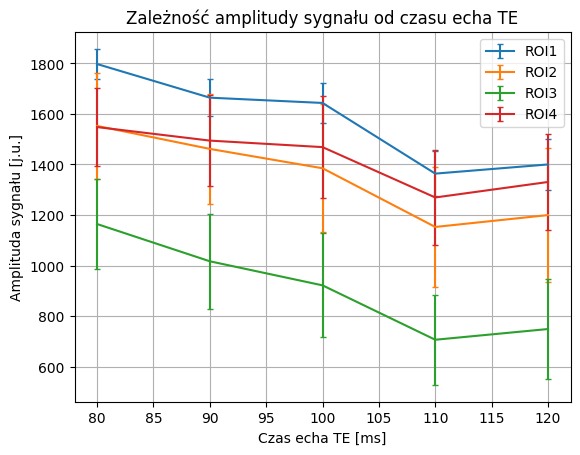

In [7]:
# Wykres zależności amplitudy sygnału od czasu
te = te_matrix[:,0]
for i in range(3,11,2):
    plt.errorbar(te, te_matrix[:,i], yerr=te_matrix[:,i+1], label="ROI"+str(int((i-1)/2)),capsize=2.5)
plt.title('Zależność amplitudy sygnału od czasu echa TE')
plt.xlabel('Czas echa TE [ms]')
plt.ylabel('Amplituda sygnału [j.u.]')
plt.legend()
plt.grid()
plt.savefig('te_wykres.pdf')
plt.show()